In [1]:
from body_matrix import load
from body_matrix import infer
from body_matrix import process
from body_matrix import draw

video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Body_Matrixes/samples/man_01.mp4", 
    90, 
    1
)

keypoints_model, keypoints_transform = load.keypoints_model("cpu")
boxes, keypoints = infer.detect_main_target(
    sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)

selected_kps = process.keypoints_filter(
    ['left_shoulder','right_shoulder','left_hip','right_hip'], 
    keypoints
)

Found  1  person in the frame
Distances:  [36.484947204589844]
Areas:  [189190.37870431272]
FOCUSES:  [5185.436548487382]
Select keypoint index 0


In [2]:
selected_kps

{'left_shoulder': [237.32237243652344, 588.5149536132812],
 'right_shoulder': [373.31524658203125, 585.63671875],
 'left_hip': [268.9263610839844, 811.0980834960938],
 'right_hip': [359.9075012207031, 812.0574951171875]}

In [3]:
for index, value in enumerate(selected_kps.values()):
    print(index, value)

0 [237.32237243652344, 588.5149536132812]
1 [373.31524658203125, 585.63671875]
2 [268.9263610839844, 811.0980834960938]
3 [359.9075012207031, 812.0574951171875]


[237.32237243652344, 588.5149536132812]
[373.31524658203125, 585.63671875]
[268.9263610839844, 811.0980834960938]
[359.9075012207031, 812.0574951171875]


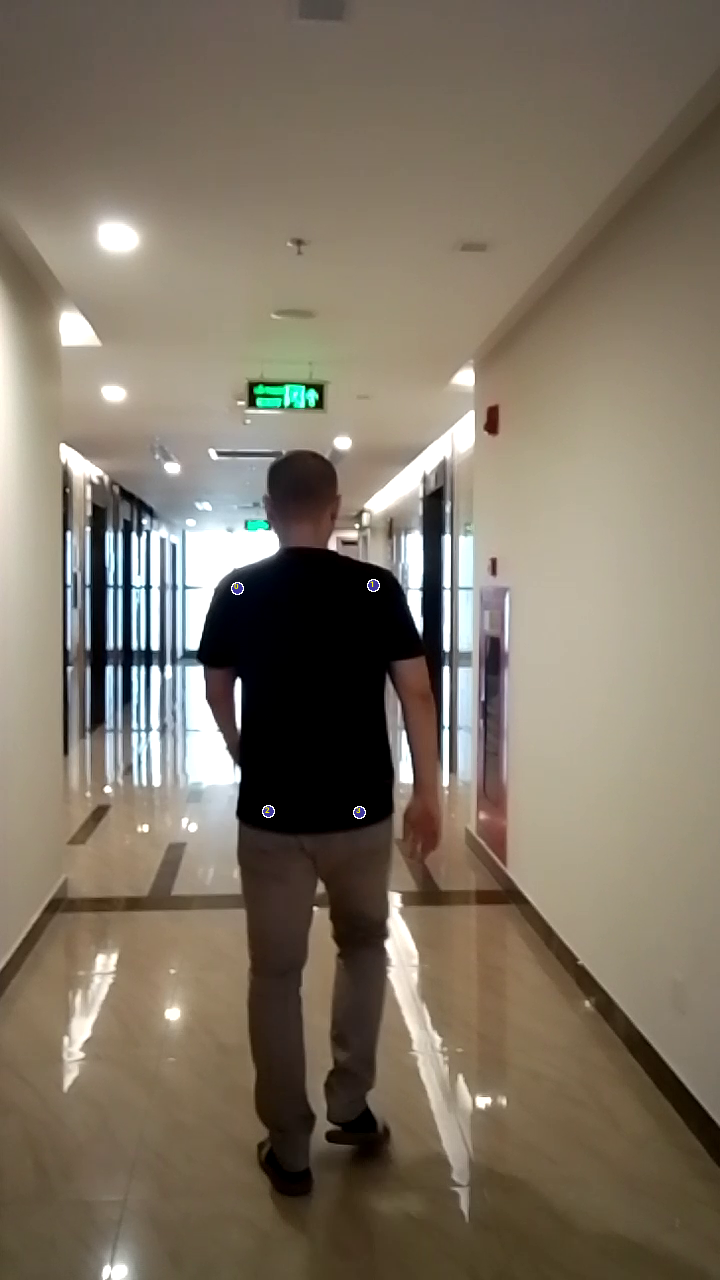

In [4]:
output = draw.keypoint_markers(
    coordinates=selected_kps,
    image=sample_frame, 
    label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf"
)

output

In [5]:
from body_matrix import measure 

middle_hip = measure.find_middle_point(
    selected_kps['left_hip'], 
    selected_kps['right_hip']
)

middle_shoulder = measure.find_middle_point(
    selected_kps['left_shoulder'], 
    selected_kps['right_shoulder']
)

middle_back = measure.find_middle_point(
    middle_shoulder, 
    middle_hip
)

middle_back

(309.86787033081055, 699.3268127441406)

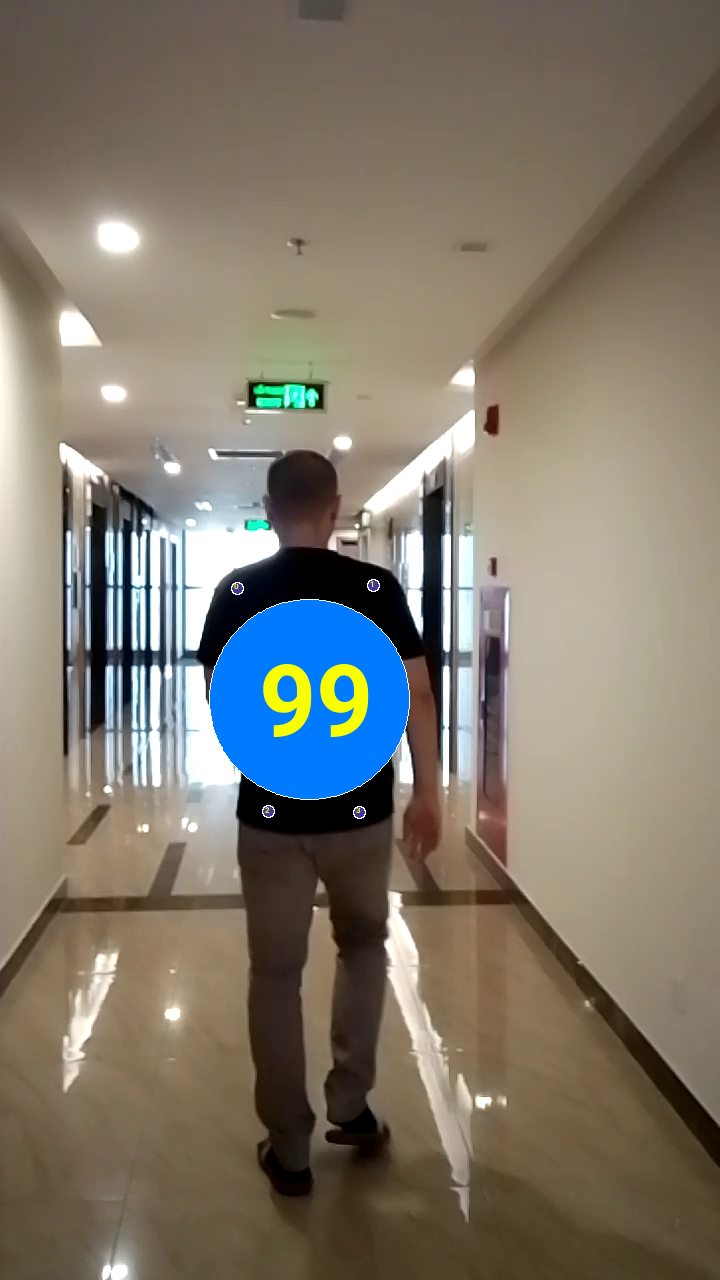

In [6]:
updated_sample = draw.circle_label(
    image=output, 
    radius = 100,
    central_point=middle_back,
    background_color = "#007AFF", 
    label= "99", 
    label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf", 
    label_color ="#FAFF00"
)
updated_sample

In [19]:
rect_sample = draw.fixed_rectangle_label(
    image=output, 
    anchor_point=[output.width/2, 100], 
    label_text="21-02-1990",
    label_size=30, 
    label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf", 
    label_color ="#FFFFFF",
    background_color = "#11114A"
)


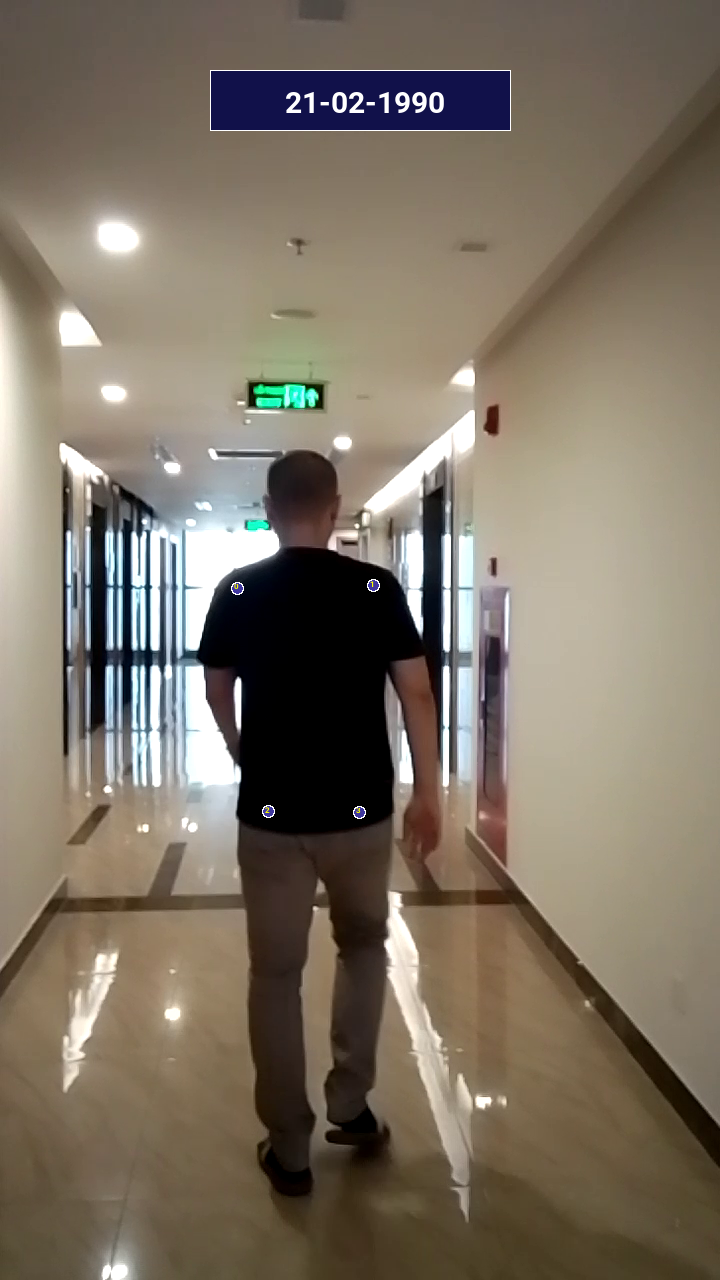

In [20]:
rect_sample